<a href="https://colab.research.google.com/github/vidhi212003/Disease-Prediction-using-Machine-Learning/blob/main/Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('/dataset.csv')
symptom_disc = pd.read_csv('/Symptom-severity.csv')

In [4]:
#import sys
#a=sys.getsizeof(df)
#print(a)
a=len(df)
print(a)#88560

4920


In [5]:
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
symptom_disc.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [7]:
a=len(symptom_disc)
print(a) #10707

133


In [8]:
#convert symptom_disc  to dictionnary
data_dict = symptom_disc .set_index('Symptom').T.to_dict()

<ipython-input-8-1d7d54d51995>:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = symptom_disc .set_index('Symptom').T.to_dict()


In [9]:
data_dict

{'itching': {'weight': 1},
 'skin_rash': {'weight': 3},
 'nodal_skin_eruptions': {'weight': 4},
 'continuous_sneezing': {'weight': 4},
 'shivering': {'weight': 5},
 'chills': {'weight': 3},
 'joint_pain': {'weight': 3},
 'stomach_pain': {'weight': 5},
 'acidity': {'weight': 3},
 'ulcers_on_tongue': {'weight': 4},
 'muscle_wasting': {'weight': 3},
 'vomiting': {'weight': 5},
 'burning_micturition': {'weight': 6},
 'spotting_urination': {'weight': 6},
 'fatigue': {'weight': 4},
 'weight_gain': {'weight': 3},
 'anxiety': {'weight': 4},
 'cold_hands_and_feets': {'weight': 5},
 'mood_swings': {'weight': 3},
 'weight_loss': {'weight': 3},
 'restlessness': {'weight': 5},
 'lethargy': {'weight': 2},
 'patches_in_throat': {'weight': 6},
 'irregular_sugar_level': {'weight': 5},
 'cough': {'weight': 4},
 'high_fever': {'weight': 7},
 'sunken_eyes': {'weight': 3},
 'breathlessness': {'weight': 4},
 'sweating': {'weight': 3},
 'dehydration': {'weight': 4},
 'indigestion': {'weight': 5},
 'headache'

In [10]:
df.shape

(4920, 18)

In [11]:
symptom_disc.shape

(133, 2)

In [12]:
#Here we are removing and replacing the white spaces
def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df

In [13]:
df=remove_space_between_words(df)
df.head

<bound method NDFrame.head of                                       Disease            Symptom_1  \
0                            Fungal_infection              itching   
1                            Fungal_infection            skin_rash   
2                            Fungal_infection              itching   
3                            Fungal_infection              itching   
4                            Fungal_infection              itching   
...                                       ...                  ...   
4915  (vertigo)_Paroymsal__Positional_Vertigo             vomiting   
4916                                     Acne            skin_rash   
4917                  Urinary_tract_infection  burning_micturition   
4918                                Psoriasis            skin_rash   
4919                                 Impetigo            skin_rash   

                 Symptom_2             Symptom_3                 Symptom_4  \
0                skin_rash  nodal_skin_eruptions   

In [14]:
df[df['Disease']=='Acne'].values

array([['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'pus_filled_pimples', 'blackheads', ..., nan, nan, nan],
       ...,
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan]],
      dtype=object)

In [15]:
df[(df['Symptom_1'] == 'itching') ]

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,Chronic_cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4883,Drug_Reaction,itching,skin_rash,stomach_pain,burning_micturition,spotting__urination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4893,Jaundice,itching,vomiting,fatigue,weight_loss,high_fever,yellowish_skin,dark_urine,abdominal_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4895,Chicken_pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Encodeing Symptoms with their weights and replacing the missing values
def encode_symptoms(df, data_severity):
    for i in data_severity.index:
        symptom = data_severity["Symptom"][i]
        weight = data_severity["weight"][i]
        df = df.replace(symptom, weight)

    # Replace missing values with 0
    df = df.fillna(0)

    # Additional hardcoded replacements
    df = df.replace("foul_smell_of_urine", 5)
    df = df.replace("dischromic__patches", 6)
    df = df.replace("spotting__urination", 6)

    return df

In [17]:
new_df = encode_symptoms(df, symptom_disc)

In [18]:
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal_infection,3,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal_infection,1,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal_infection,1,3,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal_infection,1,3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# separating the data and labels
X = new_df.drop(columns='Disease', axis=1)
Y = new_df['Disease']

In [20]:
print(X)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0             1          3          4          6          0        0.0   
1             3          4          6          0          0        0.0   
2             1          4          6          0          0        0.0   
3             1          3          6          0          0        0.0   
4             1          3          4          0          0        0.0   
...         ...        ...        ...        ...        ...        ...   
4915          5          3          5          6          4        4.0   
4916          3          2          2          2          0        0.0   
4917          6          4          5          6          0        0.0   
4918          3          3          3          2          2        2.0   
4919          3          7          4          2          3        0.0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0           0.0        0.0        

In [21]:
print(Y)

0                              Fungal_infection
1                              Fungal_infection
2                              Fungal_infection
3                              Fungal_infection
4                              Fungal_infection
                         ...                   
4915    (vertigo)_Paroymsal__Positional_Vertigo
4916                                       Acne
4917                    Urinary_tract_infection
4918                                  Psoriasis
4919                                   Impetigo
Name: Disease, Length: 4920, dtype: object


In [22]:
#Applying Knn(K-Nearest Neighbour)
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Split the data into training and testing sets with a random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Create a k-NN classifier and specify the number of neighbors e.g. 3
k=3
knn= KNeighborsClassifier(n_neighbors=k)

In [25]:
# Fit the model on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# Predict the labels for the test data
Y_pred = knn.predict(X_test)

In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

In [28]:
print("KNN")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

KNN
Accuracy: 0.991869918699187
Precision: 0.9933217189314751
Recall: 0.9909350523711186
F1-Score: 0.9915720052790706
976
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


In [29]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 30
True Negatives (TN): 18
False Positives (FP): 0
False Negatives (FN): 0


In [30]:
# Calculate the total number of samples
total_samples = TP + TN + FP + FN

TP_percentage = (TP / total_samples) * 100
TN_percentage = (TN / total_samples) * 100
FP_percentage = (FP / total_samples) * 100
FN_percentage = (FN / total_samples) * 100

print("True Positives (TP) percentage:", TP_percentage, "%")
print("True Negatives (TN) percentage:", TN_percentage, "%")
print("False Positives (FP) percentage:", FP_percentage, "%")
print("False Negatives (FN) percentage:", FN_percentage, "%")

True Positives (TP) percentage: 62.5 %
True Negatives (TN) percentage: 37.5 %
False Positives (FP) percentage: 0.0 %
False Negatives (FN) percentage: 0.0 %


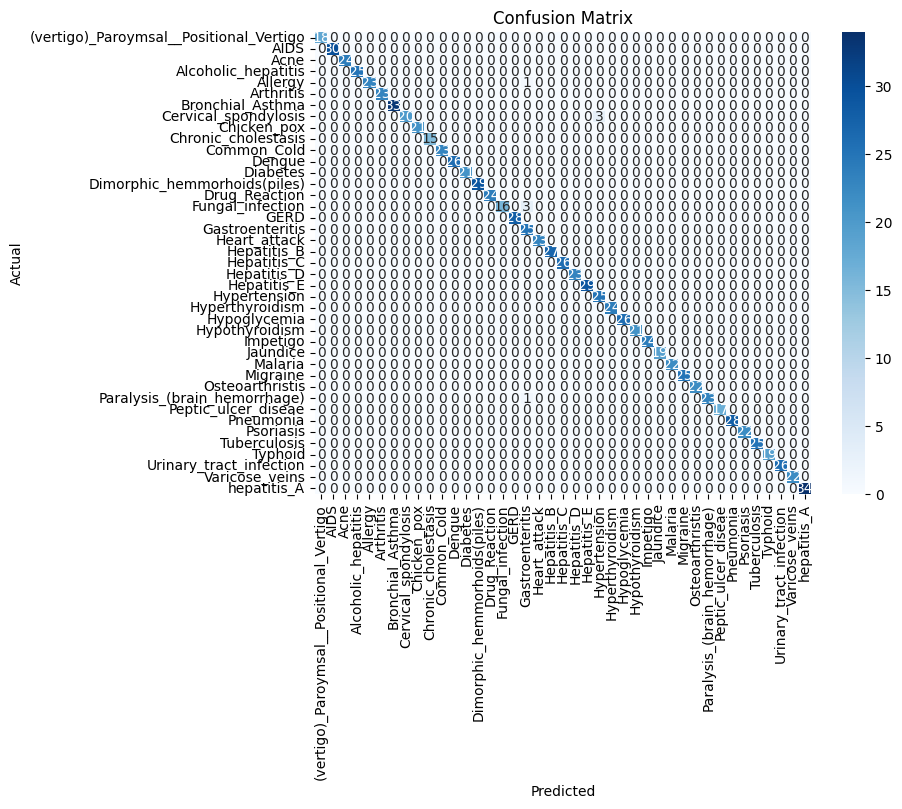

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
#Applying Naive bias algorithm(also called probability based algorithm)
from sklearn.naive_bayes import GaussianNB

In [33]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# Create a Decision Tree classifier
NB_classifier= GaussianNB()

In [35]:
# Fit the model on the training data
NB_classifier.fit(X_train, Y_train)

GaussianNB()

In [36]:
# Predict disease labels on the testing data
Y_pred = NB_classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro') # 'macro' specifies that you want to compute these metrics for each class independently and then take the unweighted average.
f1 = f1_score(Y_test, Y_pred, average='macro')

In [38]:
print("Gaussian Naive Bias")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

Gaussian Naive Bias
Accuracy: 0.8577235772357723
Precision: 0.8700957164974538
Recall: 0.8628523277630417
F1-Score: 0.8508545371573774
844
Confusion matrix
[[15  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  5  0 ... 21  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 33]]


In [39]:
#Applying SVM(Support vector machine)
from sklearn.svm import SVC

In [40]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [41]:
# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

In [42]:
# Train the model using the training data
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
# Predict disease labels on the testing data
Y_pred = svm_classifier.predict(X_test)

In [44]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

In [45]:
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

In [46]:
print("SVM")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

SVM
Accuracy: 0.9745934959349594
Precision: 0.9772876486501381
Recall: 0.9751484732642763
F1-Score: 0.9751656186007853
959
Confusion matrix
[[30  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 26]]


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [50]:
# Fit the model on the training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Predict disease labels on the testing data
Y_pred = dt_classifier.predict(X_test)

In [52]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

In [53]:
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

In [54]:
print("Decision Tree")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

Decision Tree
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-Score: 0.9914564591749411
976
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


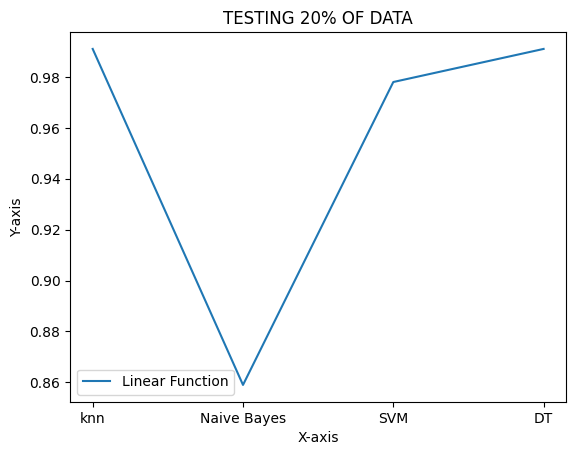

In [55]:
import matplotlib.pyplot as plt
x = ['knn', 'Naive Bayes','SVM','DT']
y = [0.991,0.859,0.978,0.991]
plt.plot(x, y, label='Linear Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('TESTING 20% OF DATA')
plt.legend()
plt.show()

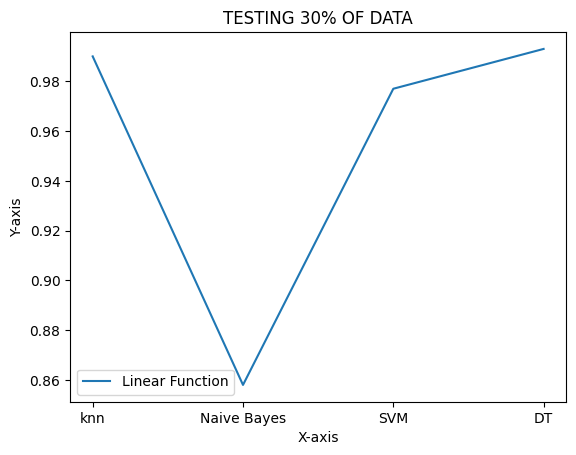

In [56]:
import matplotlib.pyplot as plt
x = ['knn', 'Naive Bayes','SVM','DT']
y = [0.990,0.858,0.977,0.993]
plt.plot(x, y, label='Linear Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('TESTING 30% OF DATA')
plt.legend()
plt.show()